In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
logins_df = pd.read_json('logins.json')

In [4]:
logins_df = logins_df.sort_values(by='login_time')

In [6]:
logins_df = logins_df.reset_index()

In [9]:
logins_df = logins_df.drop('index',axis=1)

In [11]:
total = logins_df.iloc[-1,0] - logins_df.iloc[0,0]

In [12]:
total

Timedelta('101 days 22:45:22')

In [16]:
logins_df['count'] =1

In [19]:
count_df = logins_df.groupby(pd.Grouper(key='login_time', freq='15min')).agg('sum')

In [57]:
df = count_df.reset_index()

In [64]:
dailysum =df.groupby(pd.Grouper(key='login_time', freq='1d')).agg('sum')

### Requested Plot

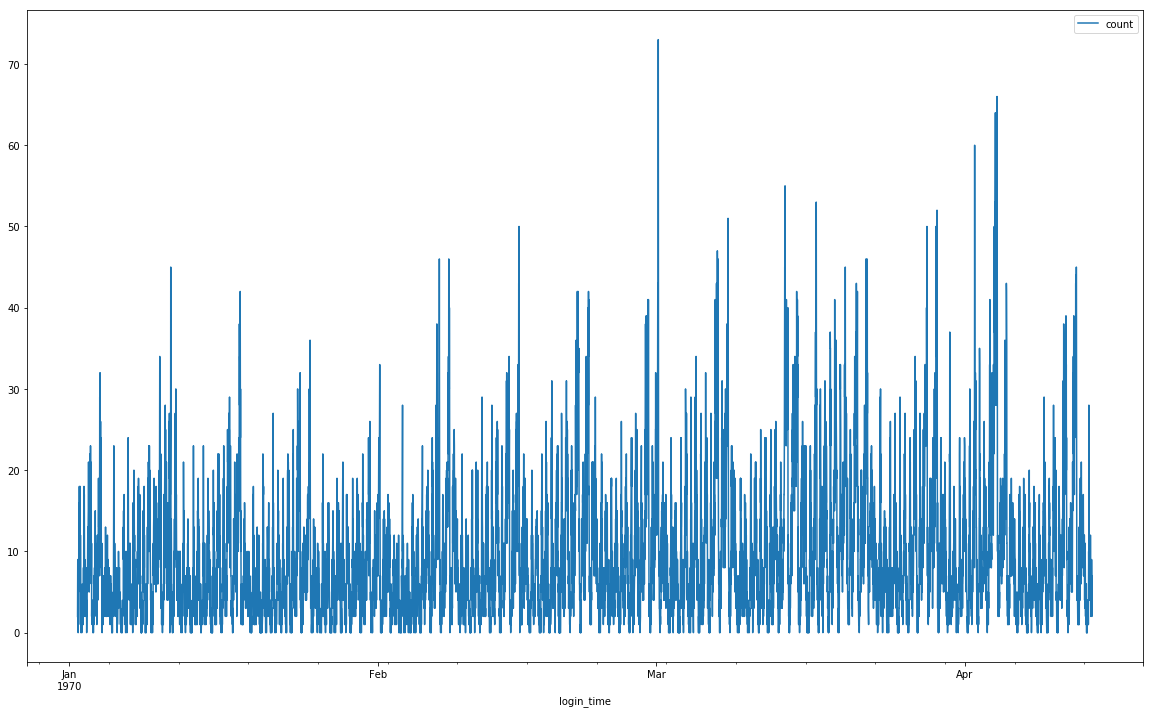

In [28]:
count_df.plot.line(figsize=(20,12))

In [29]:
fourhour_count_df = logins_df.groupby(pd.Grouper(key='login_time', freq='4h')).agg('sum')

### Using ever 4 hours intead of every 15 minutes to smooth line plot

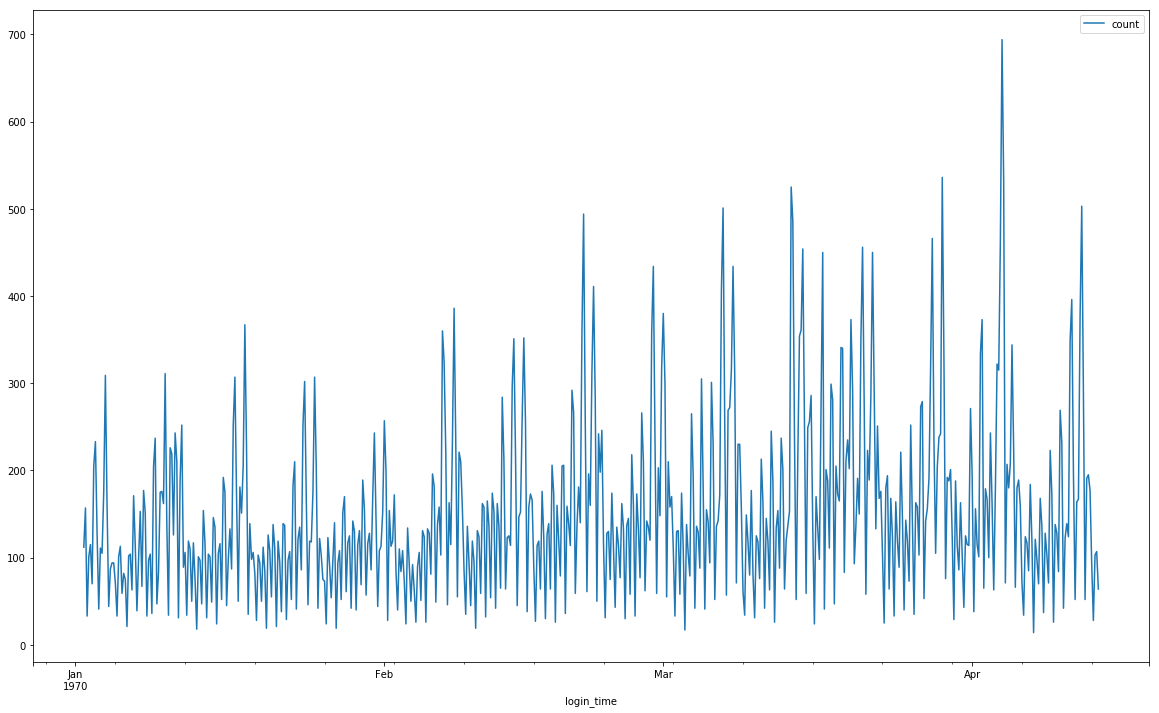

In [31]:
fourhour_count_df.plot.line(figsize=(20,12))

In [36]:
new_df = count_df.reset_index()

In [40]:
month_df = new_df.loc[new_df['login_time']< '1970-02']

### Plot for just January

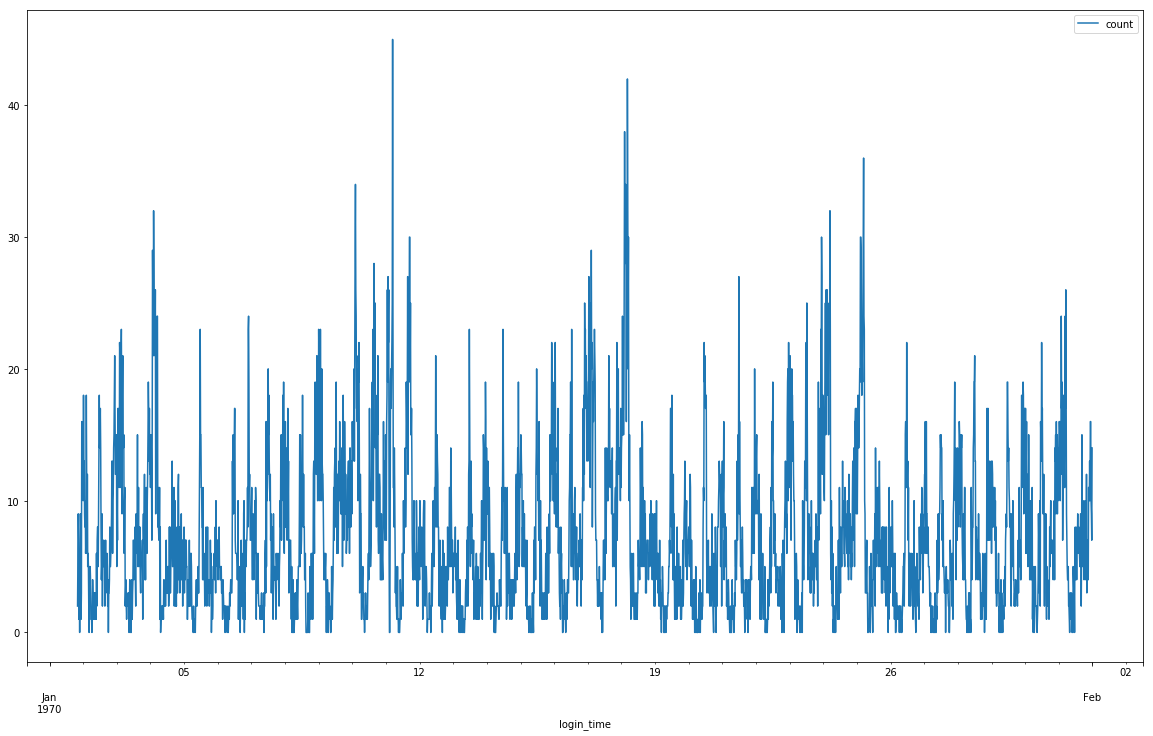

In [48]:
month_df.plot(x='login_time',y='count',figsize=(20,12))

In [49]:
week_df = new_df.loc[new_df['login_time']< '1970-01-08']

### Plot for just the first week of January

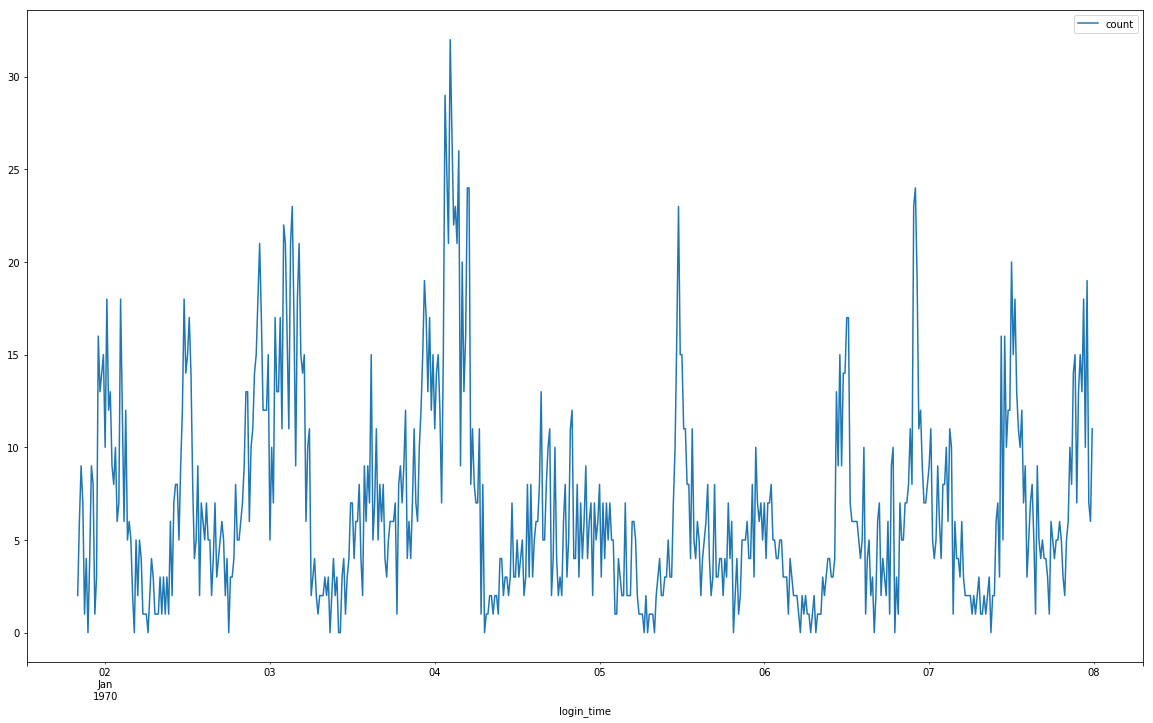

In [82]:
ax = week_df.plot(x='login_time',y='count',figsize=(20,12))
#ax.set_xticklabels(days)

### There seems to be a lull on Sunday

In [79]:
week_df.login_time.dt.strftime('%a').value_counts()

Mon    96
Wed    96
Fri    96
Sat    96
Tue    96
Sun    96
Thu    16
Name: login_time, dtype: int64

In [80]:
days = ['Thu','Fri','Sat','Sun','Mon','Tue','Wed']

### Total Logins per Day Over the Entire 4 Months

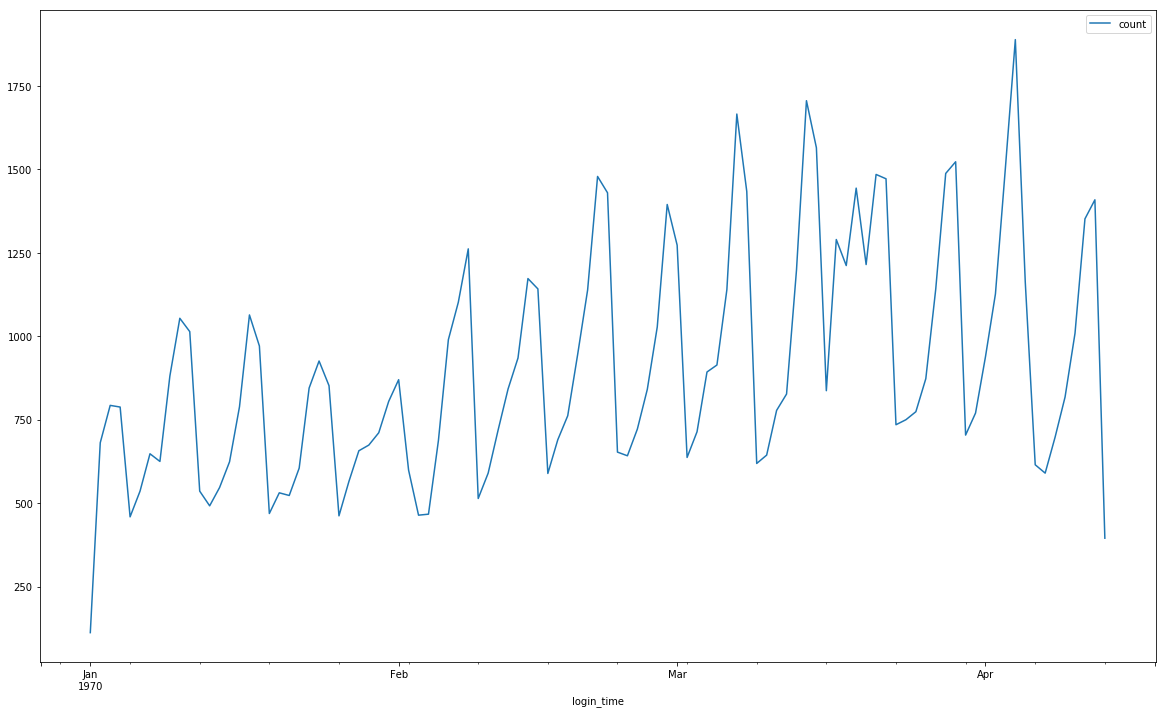

In [66]:
dailysum.plot(figsize=(20,12))